In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os

In [2]:
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Retrieve Dataset

In [3]:
punch = pd.read_csv("punch.csv").dropna()
flex = pd.read_csv("flex.csv").dropna()

In [4]:
punch #15

,aX,aY,aZ,gX,gY,gZ
0,0.415,1.614,1.463,71.167,37.598,16.785
1,0.473,2.088,1.591,98.755,40.100,29.053
2,0.517,2.562,1.727,123.108,50.171,38.696
3,0.464,2.845,1.900,136.963,62.073,46.448
4,0.286,2.842,2.050,138.611,62.378,49.500
...,...,...,...,...,...,...
1780,0.043,-0.462,0.919,2.197,0.549,7.141
1781,0.049,-0.449,0.911,-0.183,-1.404,7.996
1782,0.043,-0.417,0.927,-2.441,-1.648,7.996
1783,0.029,-0.390,0.891,-4.028,-4.028,12.939


C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['aZ'], 'r.', label='z', linestyle='solid', marker=',')


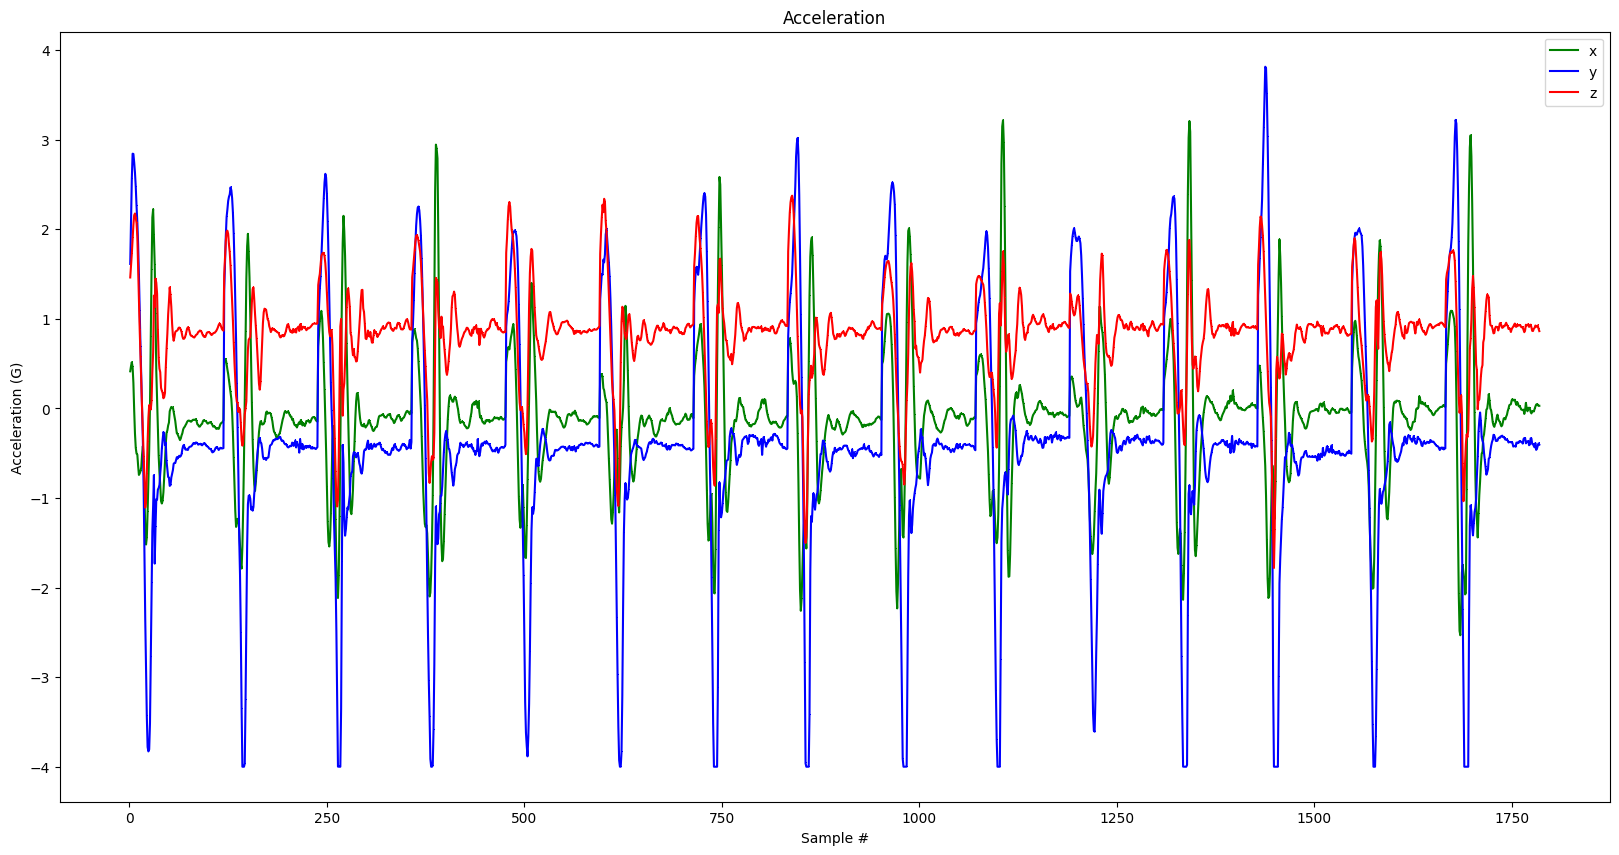

C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\4287759986.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, punch['gZ'], 'r.', label='z', linestyle='solid', marker=',')


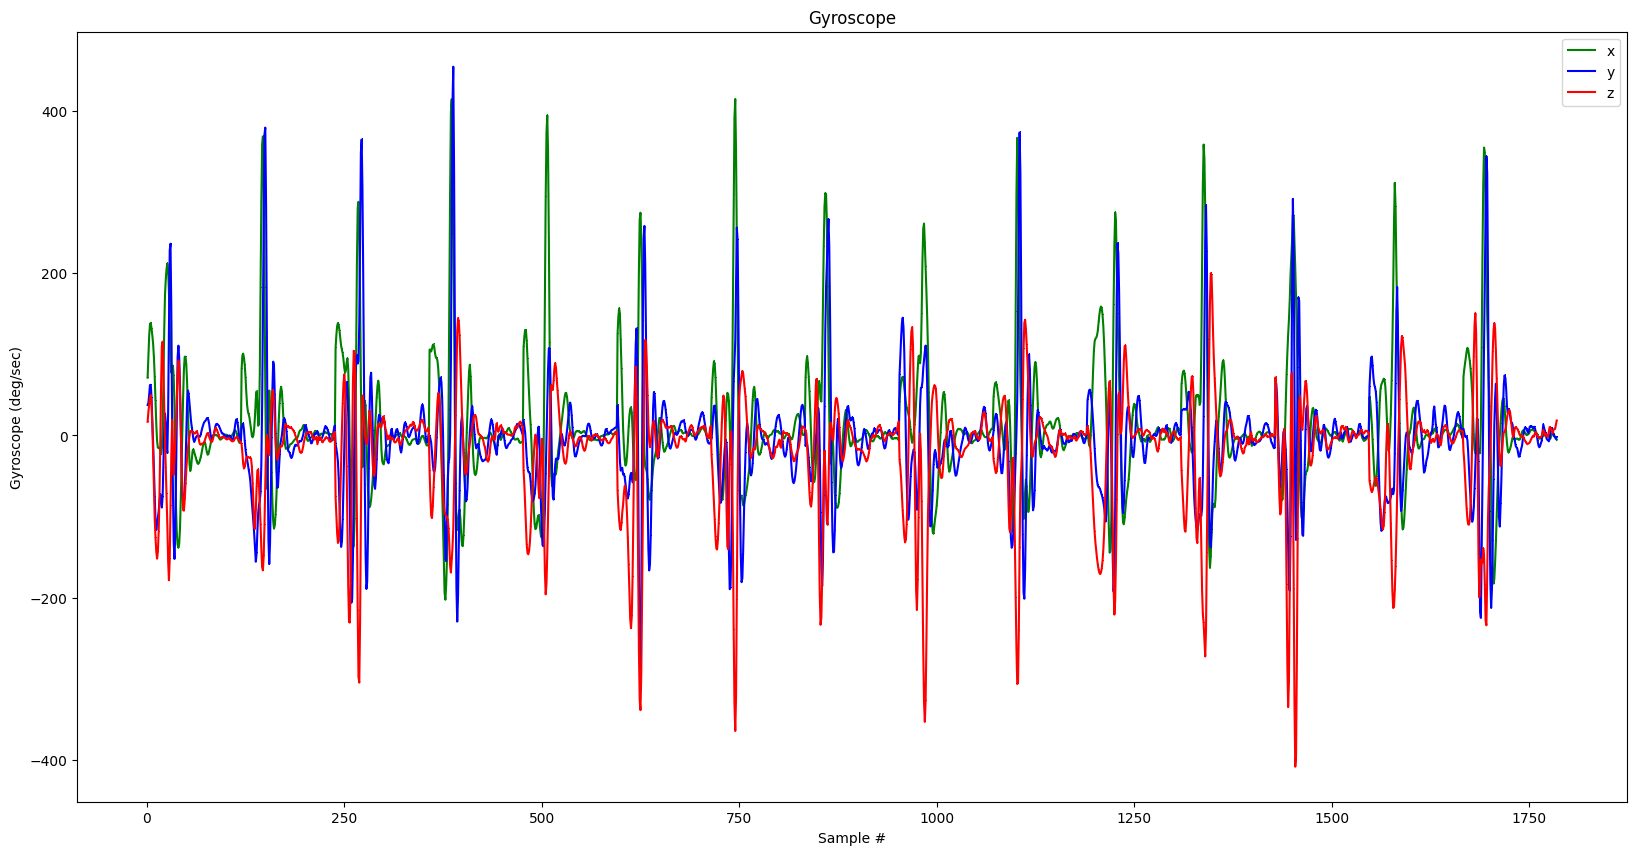

In [21]:
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, punch['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, punch['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, punch['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, punch['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, punch['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, punch['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

In [19]:
flex#15

,aX,aY,aZ,gX,gY,gZ
0,-0.323,0.366,2.443,-63.660,3.540,-4.333
1,-0.535,0.278,2.604,-107.544,-2.808,-15.686
2,-0.682,0.118,2.763,-152.771,-2.991,-28.076
3,-0.685,0.035,2.995,-197.144,2.991,-44.128
4,-0.638,0.056,3.266,-245.300,10.254,-65.674
...,...,...,...,...,...,...
1780,0.186,-0.290,-0.986,22.400,-2.075,-2.625
1781,0.186,-0.295,-0.986,20.813,-5.127,1.038
1782,0.172,-0.293,-0.986,18.555,-7.935,4.089
1783,0.155,-0.281,-0.987,16.479,-9.949,5.920


C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['aZ'], 'r.', label='z', linestyle='solid', marker=',')


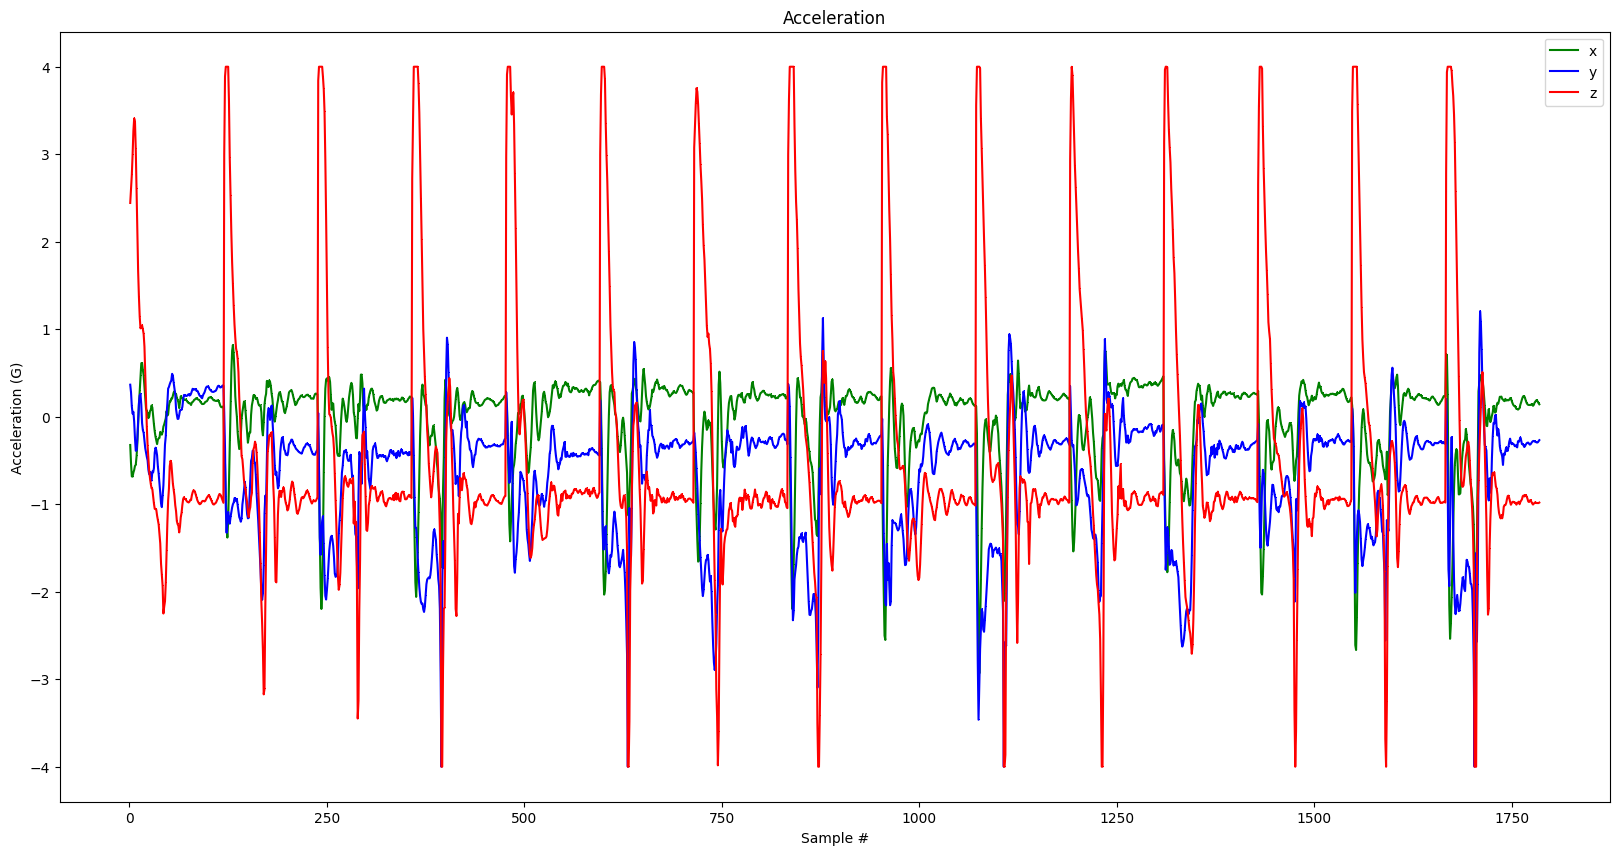

C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_25268\1594033640.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, flex['gZ'], 'r.', label='z', linestyle='solid', marker=',')


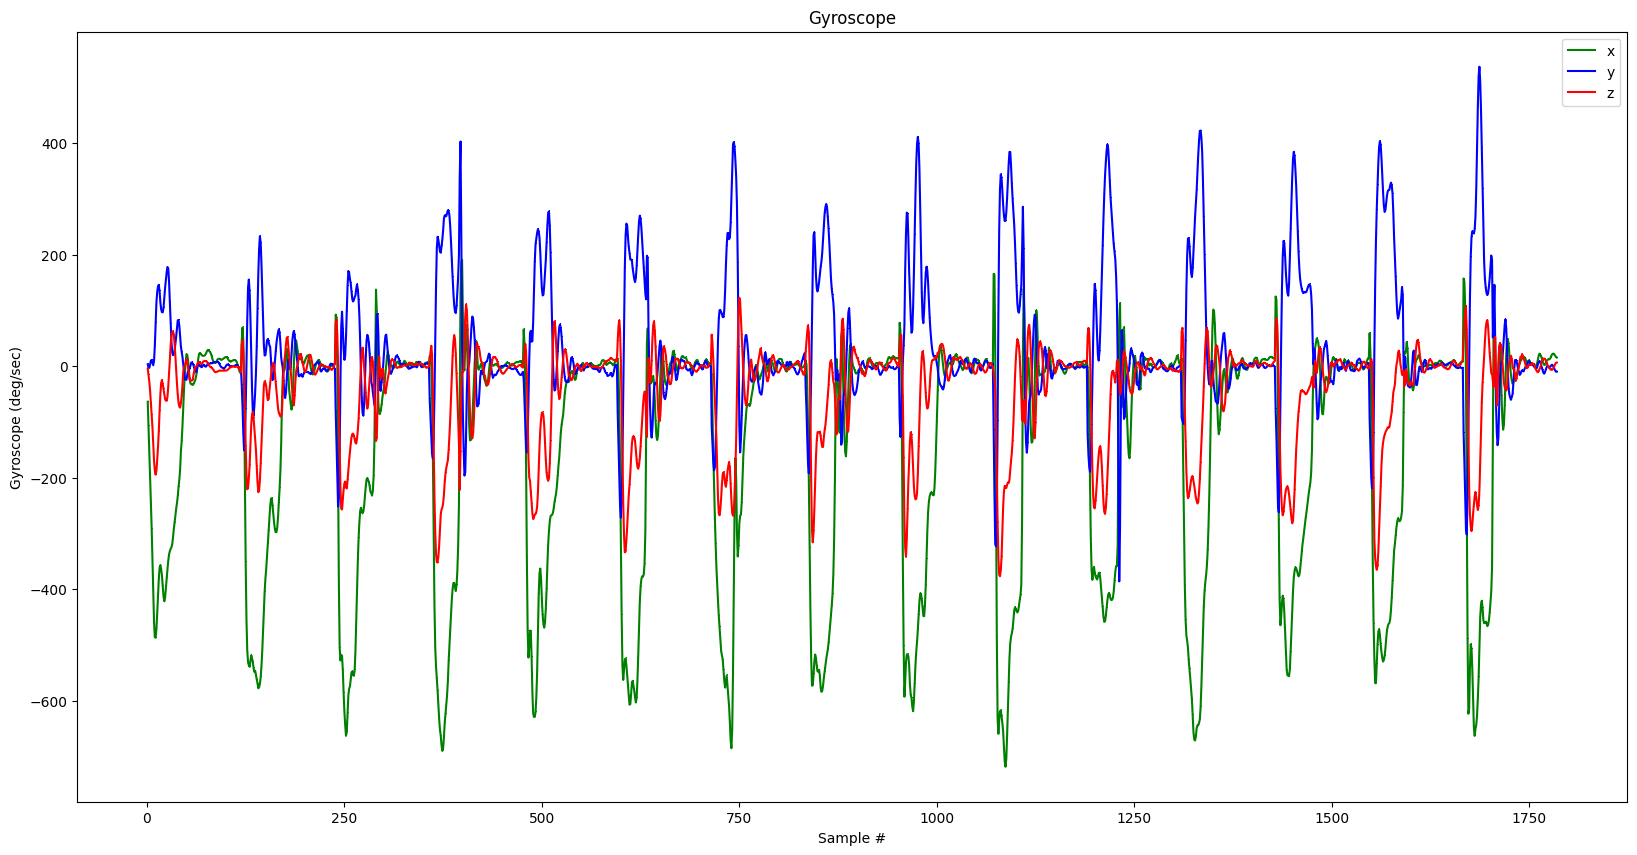

In [22]:
index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, flex['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, flex['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, flex['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, flex['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, flex['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, flex['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

In [6]:
### One Hot Encoding and Parsing

In [23]:
GESTURES = [
    "punch",
    "flex",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
print(ONE_HOT_ENCODED_GESTURES)

inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")
    
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
    df = pd.read_csv(gesture + ".csv")
    print(df.shape)

    # calculate the number of gesture recordings in the file
    num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

    print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
    
    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i * SAMPLES_PER_GESTURE + j
            # normalize the input data, between 0 to 1:
            # - acceleration is between: -4 to +4
            # - gyroscope is between: -2000 to +2000
            tensor += [
              (df['aX'][index] + 4) / 8,
              (df['aY'][index] + 4) / 8,
              (df['aZ'][index] + 4) / 8,
              (df['gX'][index] + 2000) / 4000,
              (df['gY'][index] + 2000) / 4000,
              (df['gZ'][index] + 2000) / 4000
            ]

        inputs.append(tensor)
        outputs.append(output)
    
# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

[[1. 0.]
 [0. 1.]]
Processing index 0 for gesture 'punch'.
(1785, 6)
	There are 15 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
(1785, 6)
	There are 15 recordings of the flex gesture.
Data set parsing and preparation complete.


In [8]:
inputs.shape

(30, 714)

### Splitting Data

In [9]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
Y_train, Y_test, Y_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


### Model Training

In [10]:
GestureCapture_model = tf.keras.Sequential()
GestureCapture_model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
GestureCapture_model.add(tf.keras.layers.Dense(15, activation='relu'))
GestureCapture_model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
GestureCapture_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [11]:
history_1 = GestureCapture_model.fit(x_train, Y_train, epochs=600,batch_size=1,validation_data=(x_validate,Y_validate))

Epoch 1/600
18/18 [==============================] - 1s 9ms/step - loss: 0.3193 - mae: 0.4463 - val_loss: 0.2525 - val_mae: 0.5002
Epoch 2/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2319 - mae: 0.4303 - val_loss: 0.2417 - val_mae: 0.4890
Epoch 3/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2123 - mae: 0.4341 - val_loss: 0.2345 - val_mae: 0.4737
Epoch 4/600
18/18 [==============================] - 0s 3ms/step - loss: 0.2069 - mae: 0.4355 - val_loss: 0.2293 - val_mae: 0.4634
Epoch 5/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1741 - mae: 0.3997 - val_loss: 0.3085 - val_mae: 0.5023
Epoch 6/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1756 - mae: 0.3723 - val_loss: 0.1969 - val_mae: 0.4385
Epoch 7/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1563 - mae: 0.3652 - val_loss: 0.1886 - val_mae: 0.4272
Epoch 8/600
18/18 [==============================] - 0s 2ms/step - loss: 0.1357 - m

In [12]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss)+1)

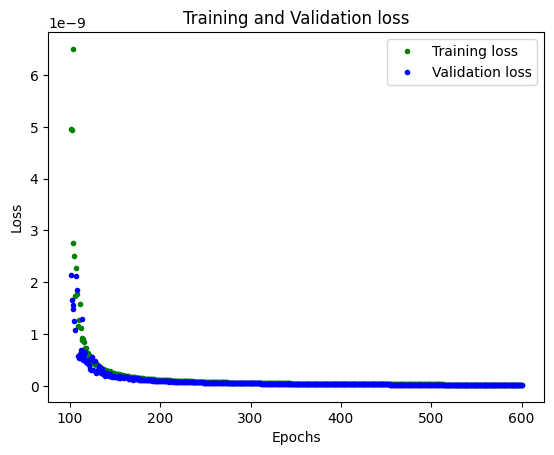

In [13]:
SKIP = 100
plt.plot(epochs[SKIP:],loss[SKIP:],'g.', label ='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

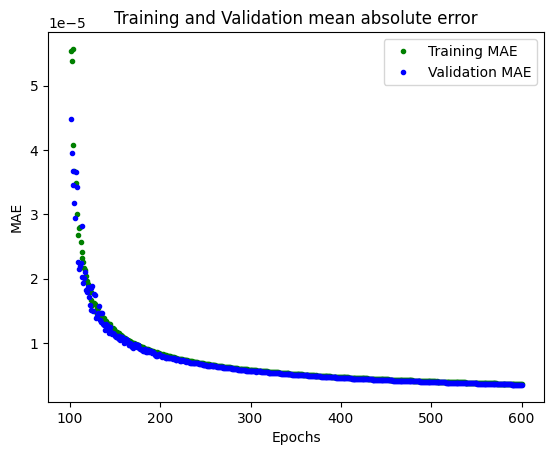

In [14]:
mae = history_1.history['mae']
val_mae =history_1.history['val_mae']

plt.plot(epochs[SKIP:],mae[SKIP:],'g.', label ='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
GestureCapture_model

In [30]:
# use the model to predict the test inputs
predictions = GestureCapture_model.predict(x_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", Y_test)

# Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
#plt.plot(x_test, Y_test, 'b.', label='Actual')
#plt.plot(x_test, predictions, 'r.', label='Predicted')
# plt.legend()
# plt.show()

1/1 [==============================] - 0s 21ms/step
predictions =
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
actual =
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


### ConvertToTensorFlowLite

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(GestureCapture_model)
GestureCapture_model_tflite = converter.convert()
open("GestureCapture_model.tflite","wb").write(GestureCapture_model_tflite)

INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmpukpe5u6o\assets


INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmpukpe5u6o\assets


148280

In [35]:
basic_model_size = os.path.getsize("GestureCapture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 148280 bytes


In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(GestureCapture_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value,dtype =np.float32,ndmin=2)]
        
converter.representative_dataset = representative_dataset_generator

GestureCapture_model_tflite_quantized = converter.convert()
open("GestureCapture_model_quantized.tflite","wb").write(GestureCapture_model_tflite_quantized)

INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmpjn1qw8ki\assets


INFO:tensorflow:Assets written to: C:\Users\chock\AppData\Local\Temp\tmpjn1qw8ki\assets
C:\Users\chock\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


39584

In [40]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [41]:
model_tflite_file = open('GestureCapture_model_quantized.tflite','rb')
model_tflite = model_tflite_file.read()
with open('GestureCapture_model_quantized.h','w') as file:
    file.write(hex_to_c_array(model_tflite,'GestureCapture_model_quantized'))

In [43]:
model_tflite_file = open('GestureCapture_model.tflite','rb')
model_tflite = model_tflite_file.read()
with open('GestureCapture_model.h','w') as file:
    file.write(hex_to_c_array(model_tflite,'GestureCapture_model'))